In [1]:
%matplotlib inline 
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import glob
import random
import re
import time
import math
import os
import sys
from sklearn.utils import shuffle

import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten, Reshape
from keras.layers.convolutional import Conv2D, MaxPooling2D, UpSampling2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.objectives import categorical_crossentropy

Using TensorFlow backend.


In [2]:
import importlib
sys.path.append('..')
import Shared  # Shared.py holds functions common to all notebooks
importlib.reload(Shared)  # In case you make changes to the Shared.py file and don't want to restart the nb kernel 

<module 'Shared' from '/home/eduardo/Desktop/Link to dynamic-projections/Models/Shared.py'>

In [3]:
nb_name = 'walk-AE_10f_10f_2f_20ep'

In [4]:
X, info_df, n_revisions, indexes_order = Shared.load_tabular('../../Datasets/walk/')

In [5]:
os.getcwd()

'/home/eduardo/PhD/Projections/dynamic-projections/Models/ae'

In [6]:
info_df.head()

,X_index,cat,point_id,t
0,0,c,c1-70,23
1,1,c,c1-79,5
2,2,c,c0-34,48
3,3,c,c2-19,42
4,4,c,c1-3,37


In [7]:
# info_df[info_df['point_id'] == 'a-0']

In [8]:
n = X.shape[1]
ae = Sequential()
ae.add(Dense(10, activation='relu', input_shape=(n,)))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(2))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(10, activation='relu'))
ae.add(Dense(n))

Instructions for updating:
Colocations handled automatically by placer.


In [9]:
ae.compile(loss='mse', optimizer='rmsprop')

In [10]:
%time ae.fit(X, X, nb_epoch=20)

Instructions for updating:
Use tf.cast instead.


/home/eduardo/.local/share/virtualenvs/dynamic-projections-ak_z834q/lib/python3.5/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/20
15000/15000 [==============================] - 1s 70us/step - loss: 0.0327
Epoch 2/20
15000/15000 [==============================] - 1s 52us/step - loss: 0.0095
Epoch 3/20
15000/15000 [==============================] - 1s 44us/step - loss: 0.0094
Epoch 4/20
15000/15000 [==============================] - 1s 36us/step - loss: 0.0094
Epoch 5/20
15000/15000 [==============================] - 1s 36us/step - loss: 0.0094
Epoch 6/20
15000/15000 [==============================] - 1s 50us/step - loss: 0.0093
Epoch 7/20
15000/15000 [==============================] - 1s 78us/step - loss: 0.0093
Epoch 8/20
15000/15000 [==============================] - 1s 58us/step - loss: 0.0093
Epoch 9/20
15000/15000 [==============================] - 1s 50us/step - loss: 0.0093
Epoch 10/20
15000/15000 [==============================] - 1s 43us/step - loss: 0.0092
Epoch 11/20
15000/15000 [==============================] - 1s 37us/step - loss: 0.0092
Epoch 12/20
15000/15000 [===========================

In [11]:
ae.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 22        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                30        
_________________________________________________________________
dense_5 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_6 (Dense)              (None, 100)               1100      
Total params: 2,382
Trainable params: 2,382
Non-trainable params: 0
_________________________________________________________________


In [12]:
# ae.save('../Models/{}.h5'.format(nb_name))

Text(0.5, 0.98, 'loss')

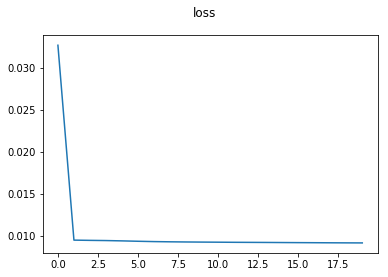

In [13]:
plt.figure()
plt.plot(ae.history.history['loss'])
plt.suptitle('loss')

In [14]:
n_revisions = info_df['t'].max() + 1

In [15]:
Shared.save_tabular_activations(ae, X, info_df, n_revisions, indexes_order, nb_name)

,id,t0d0,t0d1,t1d0,t1d1,t2d0,t2d1,t3d0,t3d1,t4d0,...,t45d0,t45d1,t46d0,t46d1,t47d0,t47d1,t48d0,t48d1,t49d0,t49d1
0,c0-0,3.690596,1.106603,3.708036,1.122529,3.702647,1.118116,3.679818,1.091893,3.690462,...,3.758772,1.161609,3.740134,1.127299,3.753683,1.153710,3.755679,1.187589,3.748794,1.202997
1,c0-1,3.341573,1.051442,3.351218,1.045371,3.315405,1.057722,3.327233,1.041615,3.317997,...,3.273728,1.170739,3.298691,1.199502,3.287484,1.206245,3.260807,1.182929,3.274569,1.193059
2,c0-2,4.064614,1.258193,4.097490,1.230287,4.108496,1.223629,4.072098,1.206507,4.040743,...,3.888735,0.913339,3.891646,0.884149,3.926152,0.878866,3.895921,0.873769,3.911383,0.875995
3,c0-3,3.788186,1.149520,3.780152,1.177513,3.746229,1.139862,3.758363,1.153752,3.749990,...,3.668787,1.411336,3.631036,1.361579,3.619936,1.355098,3.621726,1.390943,3.607752,1.437852
4,c0-4,3.687763,1.116972,3.701533,1.088960,3.713442,1.080614,3.710102,1.083120,3.707684,...,3.642284,1.163073,3.665207,1.159385,3.637078,1.179373,3.648359,1.181420,3.640915,1.171879
5,c0-5,3.940747,1.190241,3.971132,1.220001,3.959396,1.230762,3.971042,1.221709,3.947318,...,4.084895,1.259265,4.073357,1.267353,4.030054,1.269446,4.070377,1.299796,4.067394,1.272689
6,c0-6,3.482908,1.037605,3.453248,1.003269,3.436349,0.993393,3.430735,0.995244,3.485515,...,3.660603,0.770003,3.689044,0.788463,3.675093,0.737993,3.677695,0.769479,3.698189,0.818818
7,c0-7,4.330864,1.355583,4.326475,1.343993,4.305814,1.350317,4.326869,1.375235,4.345176,...,4.255012,1.540765,4.283853,1.558799,4.251722,1.577094,4.237096,1.630487,4.247546,1.645469
8,c0-8,3.526530,1.037335,3.536027,1.001130,3.543900,0.980905,3.529727,0.917834,3.532193,...,3.661493,1.024951,3.657146,1.045048,3.667286,1.055899,3.627996,1.054702,3.661676,1.110545
9,c0-9,3.398890,1.030818,3.451244,1.077466,3.487010,1.083522,3.548352,1.086721,3.498921,...,3.715709,1.484293,3.703143,1.485950,3.711034,1.512183,3.715205,1.547142,3.699964,1.535187
